# Exercise set 2
## by Vira Shulha

Importing libraries: numpy for calculating mean, sum, diistance (norm), loading data, copy for deepcopying list, matplotlib for plots.

In [16]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

Loading data from txt file

In [2]:
data = np.loadtxt('C:/disk_D/2_tampere_uni/dimensionality reduction/ex/ex2/week02/noisy_sculpt_faces.txt')

Dividing data into X (pixels) and Y (3 angles)

In [3]:
X = data[:, :256]
Y = data[:, 256:]

## A1

### a)

In [4]:
def find_k_closest(x, points, k=5):
    dists = []

    for point in points:
        dist = np.linalg.norm(x-point)
        dists.append(dist)
    
    dists_args = np.argsort(dists)
    return dists_args[:k]

Calculating leave-one-out error with nearest neighbour predictor: iterate through whole data set -> selecting one observation as test -> finding nearest neighbour for one test using remaining data as train -> calculating MSE between predicted and true value as average for 3 angles -> when iterating is ended, calculating final MSE as an average of all

In [11]:
error_scores = []

for i, el in enumerate(X):
    x = [el for j, el in enumerate(X) if j != i]
    y_predicted = Y[(find_k_closest(el, x, k=1) + 1),:]
    y_true = Y[i,:]
    error = np.sum((y_predicted - y_true) ** 2) / 3
    error_scores.append(error)
    
MSE = np.mean(error_scores)
print('MSE = ', MSE)

MSE =  1848.7184545111731


So we got MSE = 1848.72

### b)

In [12]:
min_score = np.inf
min_prev_score = 0
feature_ids = []

while min_prev_score != min_score: #  check if we have improved in previos iteration
    min_prev_score = min_score #  saving previos best score
    
    for i in range(X.shape[1]): #  iterate through all features
        if i in feature_ids: #  skip if feature is already selected
            continue
        temp_feature_ids = deepcopy(feature_ids) #  temporary feature list
        temp_feature_ids.append(i)
        new_X = X[:, temp_feature_ids] #  data for calculating leave-one-out error
        
        error_scores = [] #  calculating leave-one-out error as in a)

        for j, el in enumerate(new_X):
            x = [el for k, el in enumerate(new_X) if k != j]
            y_predicted = Y[(find_k_closest(el, x, k=1) + 1),:]
            y_true = Y[j,:]
            error = np.sum((y_predicted - y_true) ** 2) / 3
            error_scores.append(error)

        MSE = np.mean(error_scores)
        
        if MSE < min_score: # adding id if error is lower then before
            feature_ids.append(i)
            min_score = MSE

In [14]:
print('MSE = ', min_score)
print('Selected features: ', feature_ids)
print('Total number of selected features: ', len(feature_ids))

MSE =  1152.4272382224065
Selected features:  [0, 12, 18, 24, 31, 32, 98, 135, 206, 207, 219, 39, 53, 87, 101, 107, 125, 8, 9]
Total number of selected features:  19


We reached leave-one-out validation error = 1152.43. It's better then with all features: 1152.43 (now) < 1848.72 (before). 19 features were needed.

### c)

In [26]:
scores = []
feature_ids_total = []

while len(feature_ids_total) < 256:  # checking if we have added all features already
    temp_min_score = np.inf  # temp variable to select best for this iteration
    temp_feature_id = None # temp variable with id of feature with best error result
    
    for i in range(X.shape[1]):
        if i in feature_ids_total: # skip id if it is already selected
            continue
            
        temp_feature_ids = deepcopy(feature_ids_total)
        temp_feature_ids.append(i)
        new_X = X[:, temp_feature_ids]
        
        error_scores = []

        for j, el in enumerate(new_X):
            x = [el for k, el in enumerate(new_X) if k != j]
            y_predicted = Y[(find_k_closest(el, x, k=1) + 1),:]
            y_true = Y[j,:]
            error = np.sum((y_predicted - y_true) ** 2) / 3
            error_scores.append(error)

        MSE = np.mean(error_scores)
        
        if MSE < temp_min_score:
            temp_feature_id = i
            temp_min_score = MSE
            
    feature_ids_total.append(temp_feature_id)
    scores.append(temp_min_score)
    print('{} features are ordered already'.format(len(feature_ids_total))) # controling the proccess

1 features are ordered already
2 features are ordered already
3 features are ordered already
4 features are ordered already
5 features are ordered already
6 features are ordered already
7 features are ordered already
8 features are ordered already
9 features are ordered already
10 features are ordered already
11 features are ordered already
12 features are ordered already
13 features are ordered already
14 features are ordered already
15 features are ordered already
16 features are ordered already
17 features are ordered already
18 features are ordered already
19 features are ordered already
20 features are ordered already
21 features are ordered already
22 features are ordered already
23 features are ordered already
24 features are ordered already
25 features are ordered already
26 features are ordered already
27 features are ordered already
28 features are ordered already
29 features are ordered already
30 features are ordered already
31 features are ordered already
32 features are o

253 features are ordered already
254 features are ordered already
255 features are ordered already
256 features are ordered already


### d)

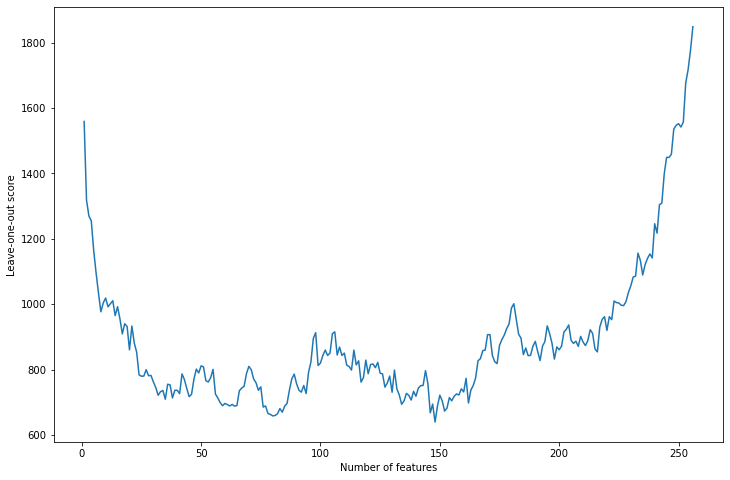

In [35]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of features')
plt.ylabel('Leave-one-out score')
plt.plot(np.arange(1, 257), scores);

In [28]:
scores = np.array(scores)
print('Number of ids with the lowest error rate: ', np.argmin(scores) , '; Error rate: ', scores[np.argmin(scores)])

Number of ids with the lowest error rate:  147 ; Error rate:  639.3854579276544


We have reached a better solution than in b) at 147 features. We have got this result due to at every iteration we selected the best feature at this iteration and because there is no linear dependency between MSE and the number of features which are selected. In some senses, in b) we have found the 'local minimum' but in c) we are able to find the 'global minimum'.

## A2

### 1.

Discuss the use of simple variable ranking methods for the Sculpt Faces data set: could, for example, ranking by Pearson correlation be used, how?

Answer: Yes, we could do it. For example, we can implement it by taking the average between 3 Pearson correlation values. These 3 values we got from calculating the correlation between X (pixels) and 3 angles. We should not just calculate a correlation between 4 variables (X and 3 angles) because we do not need to compare the correlation between angles. 

### 2.

In [29]:
scores_alone = []

for i in range(X.shape[1]):
    temp_scores = []
    new_X = X[:, i]

    for j, el in enumerate(new_X):
        x = [el for k, el in enumerate(new_X) if k != j]
        y_predicted = Y[(find_k_closest(el, x, k=1) + 1),:]
        y_true = Y[j,:]
        error = np.sum((y_predicted - y_true) ** 2) / 3
        temp_scores.append(error)

    MSE = np.mean(temp_scores)
    scores_alone.append(MSE)

In [30]:
scores_alone = np.array(scores_alone)
print(np.argsort(scores_alone))

[189  24  32 197 218 180 228 224  18  19 214  87 206 140  74 146  49  53
  58 210 174  47 229 115  96  40 191  59 219   0 238  44 112 147 244 172
  35 129  46 110 157 217  34  33 190 226  63  54  42 184  38  31  70 176
  52  15 215 117 205 119 248  61 118 207 195 167 127  94  22 101  20 203
  55 255 208  28  21 169 102   3  27 149 134  26 148 145  91 182  17 200
  97 220 230   8  81 152 107  79  43  76 222 236   5 104  25  80 160  60
 165  82 179 105 186 181  57   2 136  86 241  95 221 192 126 168 250  77
  37 231  67 234  69 247  93 150 199  99  51   1 225  68 161 153  92 173
  62  64 144 163  45 170 254 177 245 108 178  78  13  90  39   9 223  50
  84 124  71  56 194 251   4  48 233 164 141 212 253  41 137 237 193 100
  73  30 187 213 109 235 113 143 204 216 188 211 132  85 198 239 138 171
  12 125  14 162 185 133 240  16  23  66 142 120 131 154 196 114  83 252
 123 232   6 242 243 128 249 159  65 139   7  72 116 130  11  10 156 151
 175  36  89 122  75 246 155  88 135 202 158  29  9

In [33]:
# previous result in c)

print(np.array(feature_ids_total))

[189 120 116 207 197   9  26 224  32  59  18   8  13 229 222 102 228 245
 142 180 206 250 226 205 188 125 133  97 165 128  98 215 107 147  24 113
  49  87 124  54 138 218 182  17  62  12 179  81 105 137 115 253 114 112
 163  56 200 146 219  89  99  96 184  53  80 153 132 246 135 194 167   3
  37 192 241   0  46 210 140  57  84  71   2 162 240 101 166 199  39  58
 201 174 122  15 214 244  79 252  64 254   6 198 104  70  52 187 190 169
 176 233  38 171 170 238  41  40  73  68  35 195 220 251 126  29  67  27
 145 208 186 106 172   1 148 231  51  76  31  63 136 131  93 191  44  28
 212  78 155 100   5 213 185 111 255 158 154  33 248  94 227  45  20  85
 230 202 181 141 177   7  82  60  86 143  48  65  36 134  77 129 121 204
 183 159  83  72 103  74 216 242  75 217 211 243 117 175  43  50 157 247
 139 249  22  92 203  14 232  42 234  23  11 236   4  16 193  47 150 151
 123 118  91 110 173 149 156  55 152 164  66 119  69 144  90 127  30 168
  21 209 108 237  19  61  95 178 161  25 239 196 22

Most of the features in 1c) have a different order than in 2. Only the first feature is the same because we select first starting from an empty score in 1c).